#  Fake News Detection 
###  Skill Update
###  Assignment-1 

In [1]:

import pandas as pd
import matplotlib.pyplot as plt
import pickle
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression


In [2]:
# Load the dataset
fake_data = pd.read_csv("Fake.csv")
real_data = pd.read_csv("Real.csv")


In [3]:
# Preprocess analyse the text data
print(fake_data.shape)
fake_data.head()

(23481, 4)


,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [4]:
print(real_data.shape)
real_data.head()

(21417, 4)


,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


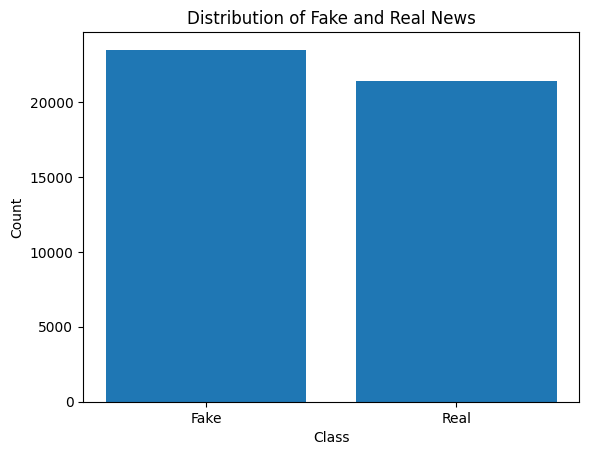

In [5]:
# Count the number of samples in each class
fake_count = len(fake_data)
real_count = len(real_data)

# Plot the bar chart
plt.bar(["Fake", "Real"], [fake_count, real_count])
plt.xlabel("Class")
plt.ylabel("Count")
plt.title("Distribution of Fake and Real News")
plt.show()

In [6]:
#Data integration
fake_data["label"] = 0  # Add a label column for fake news
real_data["label"] = 1  # Add a label column for real news


In [7]:
# Combine the fake and real data
data = pd.concat([fake_data, real_data], ignore_index=True)


In [8]:
print(data.shape)
data.head(3)


(44898, 5)


,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0


In [9]:
data.tail(3)

,title,text,subject,date,label
44895,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",1
44896,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",1
44897,Indonesia to buy $1.14 billion worth of Russia...,JAKARTA (Reuters) - Indonesia will buy 11 Sukh...,worldnews,"August 22, 2017",1


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44898 entries, 0 to 44897
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    44898 non-null  object
 1   text     44898 non-null  object
 2   subject  44898 non-null  object
 3   date     44898 non-null  object
 4   label    44898 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 1.7+ MB


## Split the data into training and testing sets

In [11]:

X_train, X_test, y_train, y_test = train_test_split(data["text"], data["label"], test_size=0.2, random_state=42)


## Create a TF-IDF vectorizer

In [12]:
# Create a TF-IDF vectorizer
vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)


In [13]:
import joblib
joblib.dump(vectorizer, 'tfidf_vectorizer.pkl')

['tfidf_vectorizer.pkl']

## Train the model (Using Logistic Regression)

In [14]:
model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression()

In [15]:
y_pred = model.predict(X_test)

## Save the model to a pickle file

In [16]:
# Save the model to a pickle file
with open("model.pkl", "wb") as file:
    pickle.dump(model, file)    

## Load the trained model

In [17]:

with open("model.pkl", "rb") as file:
    model = pickle.load(file)

In [18]:

# Preprocess the real-time news text
preprocessed_text= "This is the real-time news text to be classified as real or fake."
# Apply your specific preprocessing steps

# Vectorize the preprocessed text
vectorized_text = vectorizer.transform([preprocessed_text])

# Make predictions
prediction = model.predict(vectorized_text)


## Evaluating the model

In [19]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

In [20]:

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)



Accuracy: 0.9863028953229399
Precision: 0.9838104176442984
Recall: 0.9872851424534966
F1 Score: 0.9855447173580915


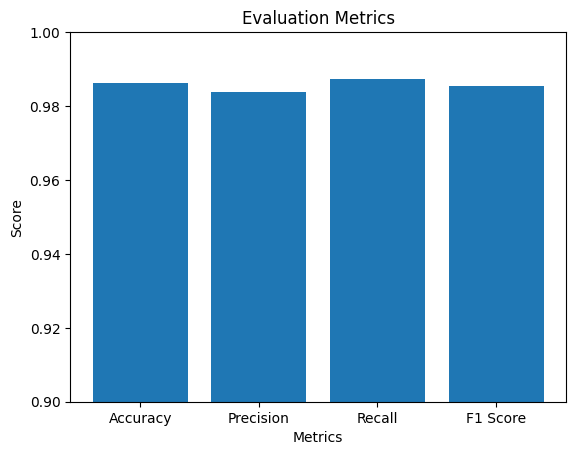

In [21]:

# Create a list of metrics and corresponding values
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
values = [accuracy, precision, recall, f1]

# Plot the bar chart
plt.bar(metrics, values)
plt.xlabel('Metrics')
plt.ylabel('Score')
plt.title('Evaluation Metrics')
plt.ylim(0.9,1)  # Set the y-axis limits between 0 and 1
plt.show()


## Testing Custom data

In [22]:
# Deployment (using the trained model to make predictions on new data)

new_article = ["This is a new article that needs to be classified as fake or real."]
new_article_vectorized = vectorizer.transform(new_article)
prediction = model.predict(new_article_vectorized)

if prediction[0] == 0:
    print("Output:" + " The article is classified as fake news.")
else:
    print("Output:" +" The article is classified as real news.")
    

Output: The article is classified as fake news.


## Alternative method Testing Custom data

In [23]:
import joblib
loaded_vectorizer = joblib.load('tfidf_vectorizer.pkl')

In [24]:
# Deployment (using the trained model to make predictions on new data)
from sklearn.feature_extraction.text import TfidfVectorizer
new_article = ["This is a new article that needs to be classified as fake or real."]
new_article_vectorized = loaded_vectorizer = joblib.load('tfidf_vectorizer.pkl').transform(new_article)
prediction = model.predict(new_article_vectorized)

if prediction[0] == 0:
    print("Output:" + " The article is classified as fake news.")
else:
    print("Output:" +" The article is classified as real news.")

Output: The article is classified as fake news.
